# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('D:/Fordham/bigdata/creditcard.csv')
df.head(5)

,Time,Period,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.dtypes

Time      float64
Period    float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Normalized Amount, Time, and Period

In [4]:
from sklearn.preprocessing import StandardScaler,RobustScaler
df['normAmount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['normTime'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))
df['normPeriod'] = RobustScaler().fit_transform(df['Period'].values.reshape(-1,1))
df.drop(['Time','Amount','Period'], axis=1, inplace=True)

In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime,normPeriod
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960,1.0


### Remove duplicates

In [6]:
df.shape

(284807, 32)

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(283911, 32)

### Any missing data??

In [9]:
print(df.isnull().sum())

V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Class         0
normAmount    0
normTime      0
normPeriod    0
dtype: int64


### How imbalanced is the dataset?

Text(0, 0.5, 'Frequency')

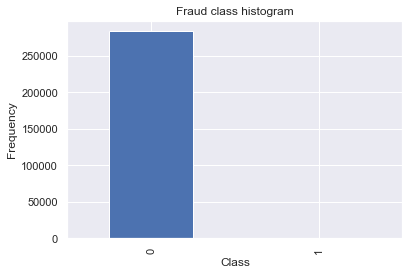

In [10]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [11]:
df.Class.value_counts()

0    283433
1       478
Name: Class, dtype: int64

### Correlation Matrix

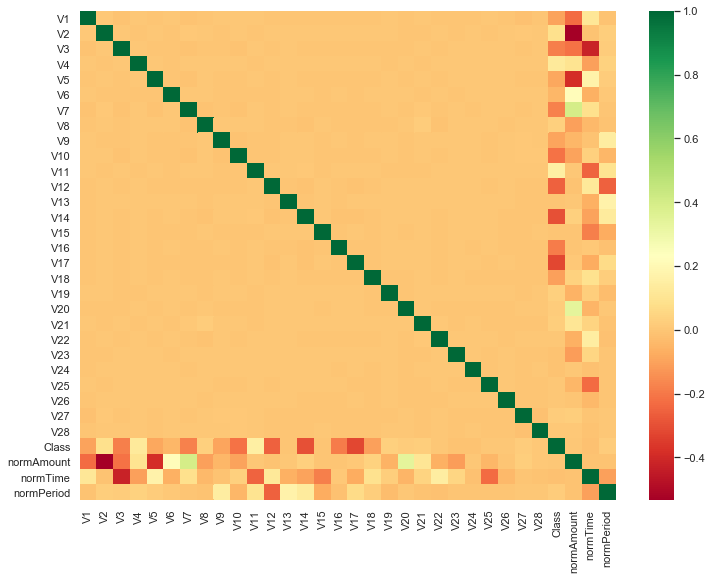

In [12]:
corrMatrix = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(data=corrMatrix,cmap="RdYlGn")

In [13]:
corrMatrix.nlargest(32,'Class')['Class']

Class         1.000000
V11           0.151083
V4            0.130718
V2            0.086034
V19           0.034381
V8            0.033279
V21           0.026014
V20           0.021846
V27           0.020384
normPeriod    0.019886
V28           0.009398
normAmount    0.005639
V22           0.005221
V26           0.004428
V25           0.003237
V15          -0.003474
V13          -0.003912
V23          -0.006282
V24          -0.007134
normTime     -0.012330
V6           -0.044612
V5           -0.089913
V9           -0.095527
V1           -0.096114
V18          -0.107283
V7           -0.176001
V3           -0.185389
V16          -0.190168
V10          -0.210660
V12          -0.254250
V14          -0.296428
V17          -0.318162
Name: Class, dtype: float64

##### Positive Correlated: V11, V4
##### Negative Correlated: V17, V14, V12, V10, V16, V3, V7, V18

In [14]:
X = df.drop('Class', axis=1)
y = df['Class']

#### Create Training and Testing sets

In [15]:
from sklearn.model_selection import train_test_split
training_features, test_features, training_target, test_target = train_test_split(X, y, 
                                                                                  test_size = 0.2, 
                                                                                  random_state = 42)

In [16]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .2,
                                                  random_state=42)

### SMOTE Oversampling

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

Using TensorFlow backend.
C:\Users\Gilbe\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Gilbe\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Gilbe\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Gilbe\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [18]:
print(y_train_res)

0         0
1         0
2         0
3         0
4         0
         ..
362799    1
362800    1
362801    1
362802    1
362803    1
Name: Class, Length: 362804, dtype: int64


#### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, f1_score
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train_res, y_train_res)

print('Validation Results')
print(metrics.classification_report(y_val, clf_rf.predict(x_val)))
print('\nTest Results')
print(metrics.classification_report(test_target, clf_rf.predict(test_features)))

print("roc_auc_score: ", roc_auc_score(test_target, clf_rf.predict(test_features)))
print("f1 score: ", f1_score(test_target, clf_rf.predict(test_features)))

Validation Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45346
           1       0.89      0.78      0.83        80

    accuracy                           1.00     45426
   macro avg       0.94      0.89      0.91     45426
weighted avg       1.00      1.00      1.00     45426


Test Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56685
           1       0.89      0.71      0.79        98

    accuracy                           1.00     56783
   macro avg       0.94      0.86      0.90     56783
weighted avg       1.00      1.00      1.00     56783

roc_auc_score:  0.8570634710618834
f1 score:  0.7909604519774011


#### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log.fit(x_train_res, y_train_res)

print('Validation Results')
print(metrics.classification_report(y_val, reg_log.predict(x_val)))
print('\nTest Results')
print(metrics.classification_report(test_target, reg_log.predict(test_features)))

print("roc_auc_score: ", roc_auc_score(test_target, reg_log.predict(test_features)))
print("f1 score: ", f1_score(test_target, reg_log.predict(test_features)))

Validation Results
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     45346
           1       0.07      0.90      0.13        80

    accuracy                           0.98     45426
   macro avg       0.53      0.94      0.56     45426
weighted avg       1.00      0.98      0.99     45426


Test Results
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56685
           1       0.07      0.89      0.13        98

    accuracy                           0.98     56783
   macro avg       0.53      0.93      0.56     56783
weighted avg       1.00      0.98      0.99     56783

roc_auc_score:  0.9333368436022199
f1 score:  0.12608695652173912


C:\Users\Gilbe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### SVC

In [21]:
from sklearn.svm import SVC

reg_svc = SVC()
reg_svc.fit(x_train_res, y_train_res)

print('Validation Results')
print(metrics.classification_report(y_val, reg_svc.predict(x_val)))
print('\nTest Results')
print(metrics.classification_report(test_target, reg_svc.predict(test_features)))

print("roc_auc_score: ", roc_auc_score(test_target, reg_svc.predict(test_features)))
print("f1 score: ", f1_score(test_target, reg_svc.predict(test_features)))

Validation Results
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     45346
           1       0.11      0.90      0.20        80

    accuracy                           0.99     45426
   macro avg       0.56      0.94      0.60     45426
weighted avg       1.00      0.99      0.99     45426


Test Results
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56685
           1       0.11      0.83      0.19        98

    accuracy                           0.99     56783
   macro avg       0.55      0.91      0.59     56783
weighted avg       1.00      0.99      0.99     56783

roc_auc_score:  0.9073113500494138
f1 score:  0.18969555035128807


#### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

reg_knn = KNeighborsClassifier()
reg_knn.fit(x_train_res, y_train_res)

print('Validation Results')
print(metrics.classification_report(y_val, reg_knn.predict(x_val)))
print('\nTest Results')
print(metrics.classification_report(test_target, reg_knn.predict(test_features)))

print("roc_auc_score: ", roc_auc_score(test_target, reg_knn.predict(test_features)))
print("f1 score: ", f1_score(test_target, reg_knn.predict(test_features)))

Validation Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45346
           1       0.45      0.81      0.58        80

    accuracy                           1.00     45426
   macro avg       0.73      0.91      0.79     45426
weighted avg       1.00      1.00      1.00     45426


Test Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56685
           1       0.46      0.80      0.58        98

    accuracy                           1.00     56783
   macro avg       0.73      0.90      0.79     56783
weighted avg       1.00      1.00      1.00     56783

roc_auc_score:  0.8971476815124039
f1 score:  0.582089552238806
